# Customer Churn Prediction using ANN (TensorFlow)


This notebook demonstrates how to build an Artificial Neural Network (ANN) using TensorFlow to predict customer churn.


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:

# Load dataset
df = pd.read_csv("data/Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:

# Drop irrelevant columns
X = df.drop(columns=["RowNumber", "CustomerId", "Surname", "Exited"])
y = df["Exited"]

# Encode categorical variables
X["Gender"] = LabelEncoder().fit_transform(X["Gender"])
X = pd.get_dummies(X, columns=["Geography"], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [6]:

# Build ANN
ann = Sequential()
ann.add(Dense(units=6, activation='relu', input_dim=X_train.shape[1]))
ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

# Compile ANN
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:

# Train the model
history = ann.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2)


Epoch 1/100
200/200 [==============================] - 3s 7ms/step - loss: 0.5656 - accuracy: 0.7322 - val_loss: 0.5089 - val_accuracy: 0.7956
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4786 - accuracy: 0.7994 - val_loss: 0.4684 - val_accuracy: 0.7987
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4467 - accuracy: 0.8078 - val_loss: 0.4461 - val_accuracy: 0.8031
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4267 - accuracy: 0.8105 - val_loss: 0.4317 - val_accuracy: 0.8000
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4117 - accuracy: 0.8142 - val_loss: 0.4195 - val_accuracy: 0.8081
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3986 - accuracy: 0.8238 - val_loss: 0.4059 - val_accuracy: 0.8213
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3860 - accuracy: 0.8364 - val_loss: 0.3939 - val_accuracy: 0.8325

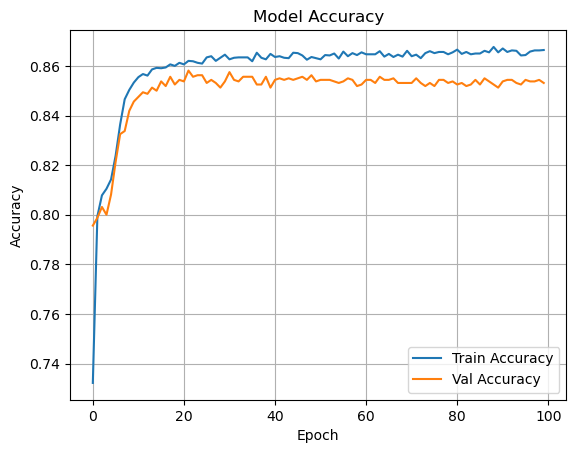

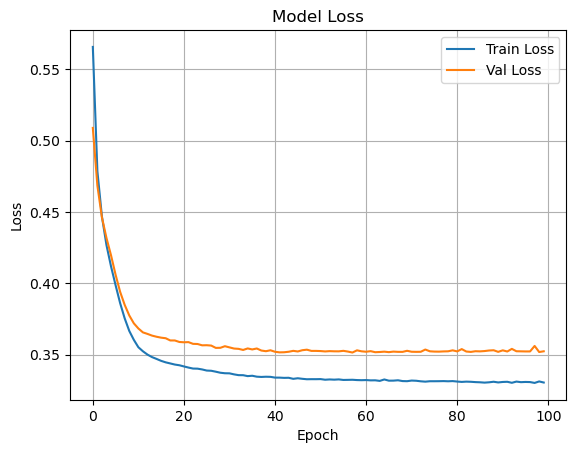

In [8]:

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [9]:

# Predict on test set
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.2f}")


63/63 [==============================] - 0s 3ms/step
Confusion Matrix:
[[1518   77]
 [ 199  206]]
Accuracy Score: 0.86


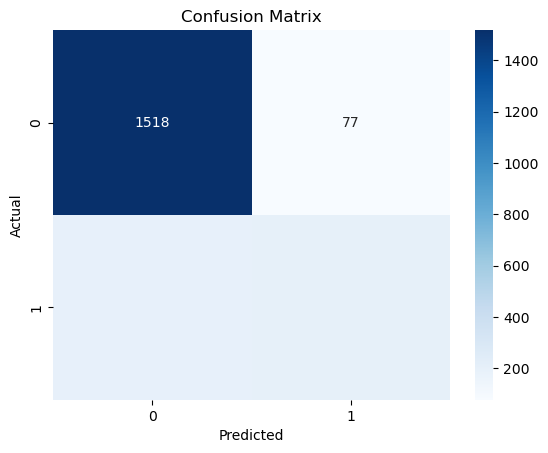

In [10]:

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
